In [3]:
import numpy as np

import pyabc
from pyabc import Distribution, RV, ABCSMC


def model(p):
    return {
        'y0': p['p0'] + 0.1 * np.random.normal(),
        'y1': p['p1'] + 100 * np.random.normal(),
    }

prior = Distribution(p0=RV('uniform', 0, 1),
                     p1=RV('uniform', 0, 1000))

obs = {'y0': 0.3, 'y1': 300}

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False), adaptive=True),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(predictor=pyabc.MLPPredictor())),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    )),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    'Learned linear tn',
    'Learned linear tt',
    'Adaptive + LL tn',
    'GP',
    'Adaptive GP',
    'MLP',
    'Model selection',
    'Info weighted ms',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,2)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=1, numx=300,
                                        x='p0', xname="$\theta$", ax=ax[0],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=1000, numx=300,
                                        x='p1', xname="$\theta$", ax=ax[1],
                                        label="PDF t={}".format(t))
    ax[1].axvline(0, color='k', linestyle='dashed', label="True value")
    ax[1].legend()
    ax[1].set_title(label)

In [4]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=86, start_time=2021-03-28 23:59:40.225532>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 235.1661468966835
INFO:ABC:t: 0, eps: 235.1661468966835.
INFO:ABC:Acceptance rate: 100 / 194 = 5.1546e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 92.77474111344227.
INFO:ABC:Acceptance rate: 100 / 266 = 3.7594e-01, ESS=8.3669e+01.
INFO:ABC:t: 2, eps: 56.496368712146136.
INFO:ABC:Acceptance rate: 100 / 409 = 2.4450e-01, ESS=8.9116e+01.
INFO:ABC:t: 3, eps: 33.52327978126282.
INFO:ABC:Acceptance rate: 100 / 569 = 1.7575e-01, ESS=7.9053e+01.
INFO:ABC:t: 4, eps: 14.1155026148991.
INFO:ABC:Acceptance rate: 100 / 1253 = 7.9808e-02, ESS=8.3539e+01.
INFO:ABC:t: 5, eps: 6.117425394839455.
INFO:ABC:Acceptance rate: 100 / 2801 = 3.5702e-02, ESS=8.4117e+01.
INFO:ABC:t: 6, eps: 3.0886677453947033.
INFO:ABC:Acceptance rate: 100 / 5397 = 1.8529e-02, ESS=6.7028e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=86, duration=0:00:11.216554, end_time=2021-03-28 23:59:51.442086>
INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 1.8361604221282333
INFO:ABC:t: 0, eps: 1.8361604221282333.
INFO:ABC:Acceptance rate: 100 / 201 = 4.9751e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0918151666695828.
INFO:ABC:Acceptance rate: 100 / 235 = 4.2553e-01, ESS=8.7340e+01.
INFO:ABC:t: 2, eps: 0.8219911283652638.
INFO:ABC:Acceptance rate: 100 / 232 = 4.3103e-01, ESS=8.6065e+01.
INFO:ABC:t: 3, eps: 0.5353056119538891.
INFO:ABC:Acceptance rate: 100 / 420 = 2.3810e-01, ESS=8.0393e+01.
INFO:ABC:t: 4, eps: 0.38812751231572284.
INFO:ABC:Acceptance rate: 100 / 693 = 1.4430e-01, ESS=7.2405e+01.
INFO:ABC:t: 5, eps: 0.2765879514224021.
INFO:ABC:Acceptance rate: 100 / 1068 = 9.3633e-02, ESS=4.1361e+01.
INFO:ABC:t: 6, eps: 0.23281660409316915.
INFO:ABC:Acceptance rate: 100 / 1360 = 7.3529e-02, ESS=7.0378e+01.
INFO:ABC:t: 7, eps: 0.14802542339390617.
INFO:ABC:Acceptance rate: 100 / 3232 = 3.0941e-02, ESS=4.7027e+01.
INFO:ABC:t: 8, eps: 0.09999886657730912.
INFO:ABC:Acceptance rate: 100 / 8235 = 1.2143e-02, ESS

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 2.176549194254056
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 2.176549194254056.
INFO:ABC:Acceptance rate: 100 / 210 = 4.7619e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.089943305903872.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=9.1635e+01.
INFO:ABC:t: 2, eps: 1.1571424183330963.
INFO:ABC:Acceptance rate: 100 / 259 = 3.8610e-01, ESS=8.1000e+01.
INFO:ABC:t: 3, eps: 1.0502932566985688.
INFO:ABC:Acceptance rate: 100 / 400 = 2.5000e-01, ESS=6.8308e+01.
INFO:ABC:t: 4, eps: 0.8206712316074223.
INFO:ABC:Acceptance rate: 100 / 766 = 1.3055e-01, ESS=6.2754e+01.
INFO:ABC:t: 5, eps: 0.5809926870954085.
INFO:ABC:Acceptance rate: 100 / 1867 = 5.3562e-02, ESS=8.8544e+01.
INFO:ABC:t: 6, eps: 0.4100938413857825.
INFO:ABC:Acceptance rate: 100 / 2078 = 4.8123e-02, ESS=6.7607e+01.
INFO:ABC:t: 7, eps: 0.3122589856437049.
INFO:ABC:Acceptance rate: 100 / 5146 = 1.9433e-02, ESS=8.4412e+01.
INFO:pyabc.util:Stopping: total simulations b

Learned linear nn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 283.0939172993619
INFO:ABC:t: 0, eps: 283.0939172993619.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 123.01398563721695.
INFO:ABC:Acceptance rate: 100 / 206 = 4.8544e-01, ESS=9.3720e+01.
INFO:ABC:t: 2, eps: 72.79775598535056.
INFO:ABC:Acceptance rate: 100 / 295 = 3.3898e-01, ESS=8.8987e+01.
INFO:ABC:t: 3, eps: 36.849702915396854.
INFO:ABC:Acceptance rate: 100 / 425 = 2.3529e-01, ESS=8.6762e+01.
INFO:ABC:t: 4, eps: 16.335679024288616.
INFO:ABC:Acceptance rate: 100 / 886 = 1.1287e-01, ESS=3.0484e+01.
INFO:ABC:t: 5, eps: 9.06192056180765.
INFO:ABC:Acceptance rate: 100 / 2233 = 4.4783e-02, ESS=7.4582e+01.
INFO:ABC:t: 6, eps: 4.229356254840717.
INFO:ABC:Acceptance rate: 100 / 3929 = 2.5452e-02, ESS=3.4702e+01.
INFO:ABC:t: 7, eps: 2.4849085679527514.
INFO:ABC:Acceptance rate: 100 / 7801 = 1.2819e-02, ESS=8.5063e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:D

Learned linear tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 245.94198803896958
INFO:ABC:t: 0, eps: 245.94198803896958.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 108.45095668913788.
INFO:ABC:Acceptance rate: 100 / 244 = 4.0984e-01, ESS=8.8652e+01.
INFO:ABC:t: 2, eps: 61.87936979146334.
INFO:ABC:Acceptance rate: 100 / 357 = 2.8011e-01, ESS=7.7222e+01.
INFO:ABC:t: 3, eps: 30.415281922751376.
INFO:ABC:Acceptance rate: 100 / 572 = 1.7483e-01, ESS=1.2691e+01.
INFO:ABC:t: 4, eps: 18.4956303251103.
INFO:ABC:Acceptance rate: 100 / 1069 = 9.3545e-02, ESS=8.3782e+01.
INFO:ABC:t: 5, eps: 7.064947851618301.
INFO:ABC:Acceptance rate: 100 / 2400 = 4.1667e-02, ESS=7.8472e+01.
INFO:ABC:t: 6, eps: 3.590615220021147.
INFO:ABC:Acceptance rate: 100 / 4092 = 2.4438e-02, ESS=8.2039e+01.
INFO:ABC:t: 7, eps: 1.8307631169251868.
INFO:ABC:Acceptance rate: 100 / 8840 = 1.1312e-02, ESS=8.2331e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History

Learned linear tt


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.4548921292824262
INFO:ABC:t: 0, eps: 1.4548921292824262.
INFO:ABC:Acceptance rate: 100 / 160 = 6.2500e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9415573559285717.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=9.0543e+01.
INFO:ABC:t: 2, eps: 0.665070680556751.
INFO:ABC:Acceptance rate: 100 / 269 = 3.7175e-01, ESS=7.8338e+01.
INFO:ABC:t: 3, eps: 0.45550233677271784.
INFO:ABC:Acceptance rate: 100 / 369 = 2.7100e-01, ESS=9.2574e+01.
INFO:ABC:t: 4, eps: 0.31146314701382527.
INFO:ABC:Acceptance rate: 100 / 524 = 1.9084e-01, ESS=6.3568e+01.
INFO:ABC:t: 5, eps: 0.24110399208624958.
INFO:ABC:Acceptance rate: 100 / 786 = 1.2723e-01, ESS=7.7246e+01.
INFO:ABC:t: 6, eps: 0.1662276678963735.
INFO:ABC:Acceptance rate: 100 / 1500 = 6.6667e-02, ESS=8.7792e+01.
INFO:ABC:t: 7, eps: 0.1163695201441234.
INFO:ABC:Acceptance rate: 100 / 2415 = 4.1408e-02, ESS=5.6913e+01.
INFO:ABC:t: 8, eps: 0.09049918747799536.
INFO:ABC:Acceptanc

Adaptive + LL tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.5614721009426635
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.5614721009426635.
INFO:ABC:Acceptance rate: 100 / 244 = 4.0984e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.8992364359748936.
INFO:ABC:Acceptance rate: 100 / 217 = 4.6083e-01, ESS=9.4186e+01.
INFO:ABC:t: 2, eps: 0.7841935652264322.
INFO:ABC:Acceptance rate: 100 / 248 = 4.0323e-01, ESS=8.4677e+01.
INFO:ABC:t: 3, eps: 0.7322671079005313.
INFO:ABC:Acceptance rate: 100 / 418 = 2.3923e-01, ESS=8.5352e+01.
INFO:ABC:t: 4, eps: 0.5924184070166447.
INFO:ABC:Acceptance rate: 100 / 504 = 1.9841e-01, ESS=8.1218e+01.
INFO:ABC:t: 5, eps: 0.4309687222354569.
INFO:ABC:Acceptance rate: 100 / 990 = 1.0101e-01, ESS=4.2786e+01.
INFO:ABC:t: 6, eps: 0.3266046596607776.
INFO:ABC:Acceptance rate: 100 / 2195 = 4.5558e-02, ESS=2.3006e+01.
INFO:ABC:t: 7, eps: 0.2195093530351439.
INFO:ABC:Acceptance rate: 100 / 5903 = 1.6941e-02, ESS=7.7832e+01.
INFO:

GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.5056849537894508
INFO:ABC:t: 0, eps: 1.5056849537894508.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9815762492670677.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=9.4281e+01.
INFO:ABC:t: 2, eps: 0.600555960771625.
INFO:ABC:Acceptance rate: 100 / 307 = 3.2573e-01, ESS=8.5574e+01.
INFO:ABC:t: 3, eps: 0.4202856785700545.
INFO:ABC:Acceptance rate: 100 / 441 = 2.2676e-01, ESS=7.1152e+01.
INFO:ABC:t: 4, eps: 0.31133982574645397.
INFO:ABC:Acceptance rate: 100 / 720 = 1.3889e-01, ESS=7.8869e+01.
INFO:ABC:t: 5, eps: 0.2203231996590159.
INFO:ABC:Acceptance rate: 100 / 938 = 1.0661e-01, ESS=1.2734e+01.
INFO:ABC:t: 6, eps: 0.12868681312835226.
INFO:ABC:Acceptance rate: 100 / 4019 = 2.4882e-02, ESS=6.7091e+01.
INFO:ABC:t: 7, eps: 0.09618980614809901.
INFO:ABC:Acceptance rate: 100 / 6438 = 1.5533e-02, ESS=6.9504e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:Histor

Adaptive GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.73202100867023
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.73202100867023.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0817525810581652.
INFO:ABC:Acceptance rate: 100 / 217 = 4.6083e-01, ESS=8.1639e+01.
INFO:ABC:t: 2, eps: 0.9476051459380836.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=7.6152e+01.
INFO:ABC:t: 3, eps: 0.8025812954903109.
INFO:ABC:Acceptance rate: 100 / 435 = 2.2989e-01, ESS=8.7838e+01.
INFO:ABC:t: 4, eps: 0.572692523388627.
INFO:ABC:Acceptance rate: 100 / 508 = 1.9685e-01, ESS=2.5373e+01.
INFO:ABC:t: 5, eps: 0.5358192832475592.
INFO:ABC:Acceptance rate: 100 / 1267 = 7.8927e-02, ESS=6.7511e+01.
INFO:ABC:t: 6, eps: 0.36029932088667677.
INFO:ABC:Acceptance rate: 100 / 1646 = 6.0753e-02, ESS=5.7725e+01.
INFO:ABC:t: 7, eps: 0.2927064331297647.
INFO:ABC:Acceptance rate: 100 / 2993 = 3.3411e-02, ESS=5.6936e+01.
INFO:ABC:t: 

MLP


INFO:Predictor:Fitted MLPPredictor
INFO:Epsilon:initial epsilon is 0.0
INFO:ABC:t: 0, eps: 0.0.
INFO:ABC:Acceptance rate: 100 / 101 = 9.9010e-01, ESS=1.0000e+02.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=95, duration=0:00:00.617020, end_time=2021-03-29 00:01:49.597198>
INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=96, start_time=2021-03-29 00:01:49.645416>
INFO:ABC:Calibration sample t=-1.


MLP adaptive


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.5179967678544088
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.5179967678544088.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 0.9947229173215221.
INFO:ABC:Acceptance rate: 100 / 222 = 4.5045e-01, ESS=9.6084e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 2, eps: 0.6825559492017298.
INFO:ABC:Acceptance rate: 100 / 323 = 3.0960e-01, ESS=8.6679e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 3, eps: 0.5614304118598511.
INFO:ABC:Acceptance rate: 100 / 356 = 2.8090e-01, ESS=4.9732e+01.
INFO:ABC:t: 4, eps: 0.43814187090167034.
INFO:ABC:Acceptance rate: 100 / 775 = 1.2903e-01, ESS=8.2937e+01.
INFO:ABC:t: 5, eps: 0.2870372345295416.
INFO:ABC:Acceptance rate: 100 / 1111 = 9.0009e-02, ESS=5.0543e+01.
INFO:ABC:t: 6, eps: 0.22359538377195318.
INFO:ABC:Acceptance rate: 100 / 2149 = 4.6533e-02, ESS=1.6679e

Model selection


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 2.33e+00
INFO:Predictor:Score GPPredictor: 2.23e+00
INFO:Predictor:Score MLPPredictor: 4.57e+00
INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.6486433438895447
INFO:ABC:t: 0, eps: 1.6486433438895447.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0119566968386535.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=9.5296e+01.
INFO:ABC:t: 2, eps: 0.695957247935

Info weighted ms


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 2.24e+00
INFO:Predictor:Score GPPredictor: 2.24e+00
INFO:Predictor:Score MLPPredictor: 2.31e+00
INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 3.3335230018821655
INFO:ABC:t: 0, eps: 3.3335230018821655.
INFO:ABC:Acceptance rate: 100 / 192 = 5.2083e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.6420465044492338.
INFO:ABC:Acceptance rate: 100 / 235 = 4.2553e-01, ESS=8.3997e+01.
INFO:ABC:t: 2, eps: 1.023673400219

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

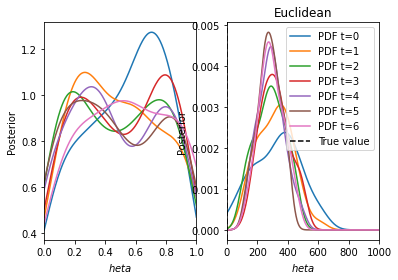

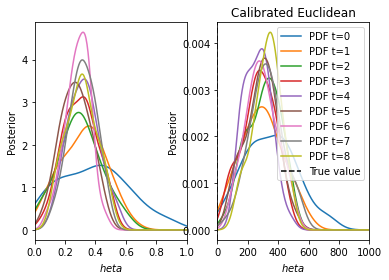

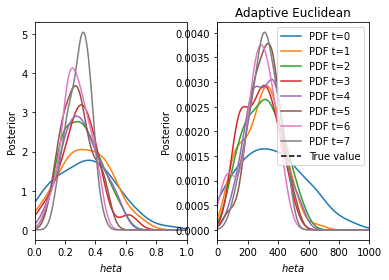

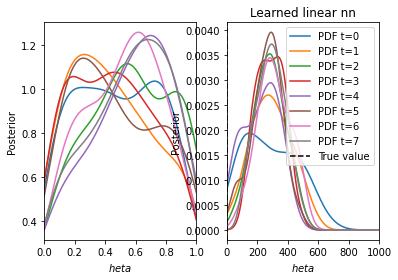

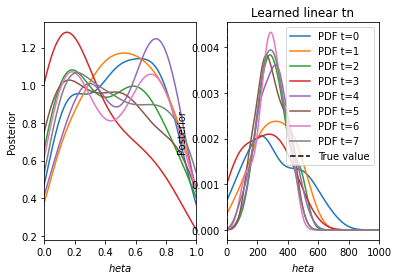

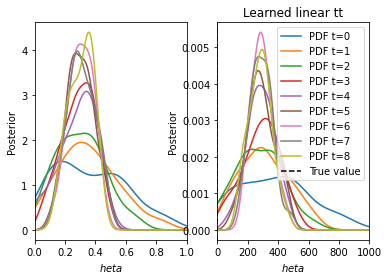

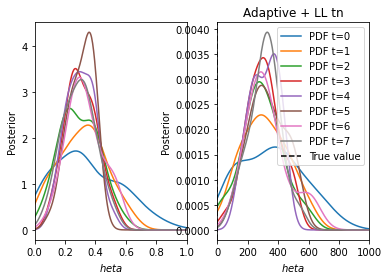

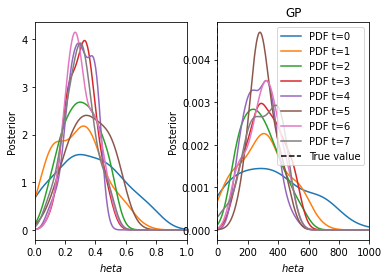

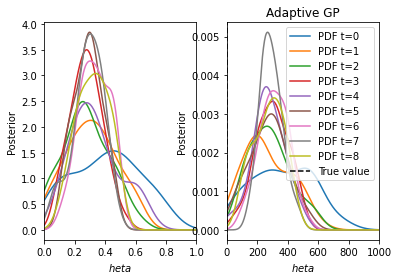

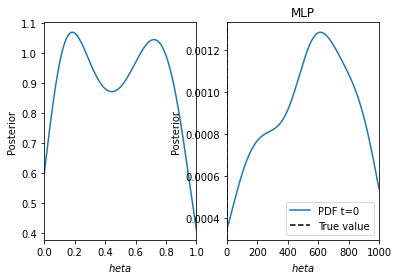

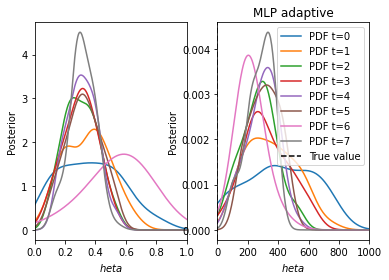

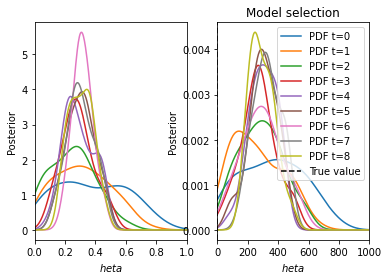

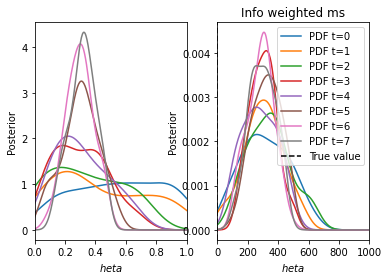

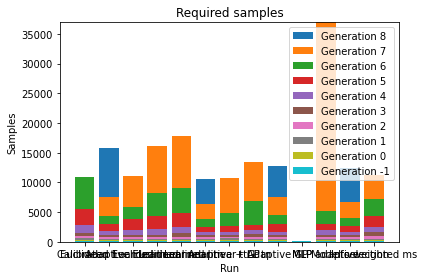

In [5]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)